# RealEstate - Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("Boston.csv")

In [3]:
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          501 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [5]:
housing['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

In [6]:
housing.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.288860,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.704471,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
# Plot Histogram
# import matplotlib.pyplot as plt
# housing.hist(bins = 50, figsize = (20,15))

## Train & Test 

In [9]:
# train_set,test_set = split_train_test(housing, 0.2)

In [10]:
# print(f"Rows in train set: {len(train_set)}\nRows in test test set: {len(test_set)}\n")

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in train set: {len(train_set)}\nRows in test test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test test set: 102



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['chas']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,261.215686,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,143.518697,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,2.000000,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,151.750000,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,268.500000,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,378.000000,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,506.000000,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  102 non-null    int64  
 1   crim        102 non-null    float64
 2   zn          102 non-null    float64
 3   indus       102 non-null    float64
 4   chas        102 non-null    int64  
 5   nox         102 non-null    float64
 6   rm          102 non-null    float64
 7   age         102 non-null    float64
 8   dis         102 non-null    float64
 9   rad         102 non-null    int64  
 10  tax         102 non-null    int64  
 11  ptratio     102 non-null    float64
 12  black       102 non-null    float64
 13  lstat       102 non-null    float64
 14  medv        102 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 12.8 KB


In [15]:
strat_test_set['chas'].value_counts()

0    95
1     7
Name: chas, dtype: int64

In [16]:
strat_train_set['chas'].value_counts()

0    376
1     28
Name: chas, dtype: int64

In [17]:
# 95/7

In [18]:
# 376/28

In [19]:
housing = strat_train_set.copy()

# Correlations

In [20]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending = False)

medv          1.000000
rm            0.678572
black         0.361761
zn            0.339741
dis           0.240451
chas          0.205066
Unnamed: 0   -0.223041
age          -0.364596
rad          -0.374693
crim         -0.393715
nox          -0.422873
tax          -0.456657
indus        -0.473516
ptratio      -0.493534
lstat        -0.740494
Name: medv, dtype: float64

array([[<AxesSubplot:xlabel='medv', ylabel='medv'>,
        <AxesSubplot:xlabel='rm', ylabel='medv'>,
        <AxesSubplot:xlabel='zn', ylabel='medv'>,
        <AxesSubplot:xlabel='lstat', ylabel='medv'>],
       [<AxesSubplot:xlabel='medv', ylabel='rm'>,
        <AxesSubplot:xlabel='rm', ylabel='rm'>,
        <AxesSubplot:xlabel='zn', ylabel='rm'>,
        <AxesSubplot:xlabel='lstat', ylabel='rm'>],
       [<AxesSubplot:xlabel='medv', ylabel='zn'>,
        <AxesSubplot:xlabel='rm', ylabel='zn'>,
        <AxesSubplot:xlabel='zn', ylabel='zn'>,
        <AxesSubplot:xlabel='lstat', ylabel='zn'>],
       [<AxesSubplot:xlabel='medv', ylabel='lstat'>,
        <AxesSubplot:xlabel='rm', ylabel='lstat'>,
        <AxesSubplot:xlabel='zn', ylabel='lstat'>,
        <AxesSubplot:xlabel='lstat', ylabel='lstat'>]], dtype=object)

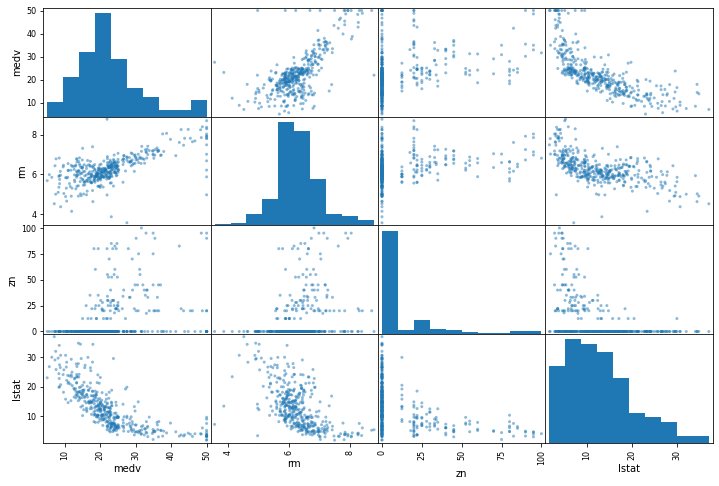

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["medv", "rm", "zn", "lstat"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot:xlabel='rm', ylabel='medv'>

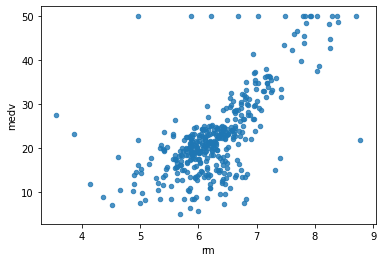

In [22]:
housing.plot(kind = "scatter", x = "rm", y = "medv", alpha = 0.8)

#  Attributes Combinations

In [23]:
housing["taxrm"] = housing['tax']/housing['rm']

In [24]:
housing["taxrm"]

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: taxrm, Length: 404, dtype: float64

In [25]:
housing.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,taxrm
254,255,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,349,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,477,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,322,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,327,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [26]:
corr_matrix = housing.corr()
corr_matrix['medv'].sort_values(ascending = False)

medv          1.000000
rm            0.678572
black         0.361761
zn            0.339741
dis           0.240451
chas          0.205066
Unnamed: 0   -0.223041
age          -0.364596
rad          -0.374693
crim         -0.393715
nox          -0.422873
tax          -0.456657
indus        -0.473516
ptratio      -0.493534
taxrm        -0.530471
lstat        -0.740494
Name: medv, dtype: float64

<AxesSubplot:xlabel='taxrm', ylabel='medv'>

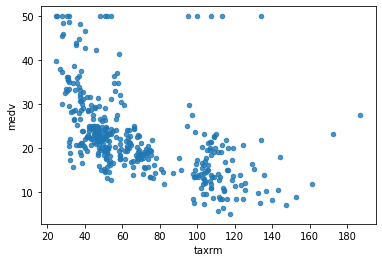

In [27]:
housing.plot(kind = "scatter", x = "taxrm", y = "medv", alpha = 0.8)

In [28]:
housing = strat_train_set.drop("medv", axis=1)
housing_labels = strat_train_set["medv"].copy()

# Missing Attributes

In [29]:
# remove missing datapoint
# housing.dropna(subset=["rm"])
# OR remove whole attribute
# housing.drop("rm", axis=1)
# set the value to zero , mean , median

In [30]:
median = housing["rm"].median()
median

6.219

In [31]:
housing["rm"].fillna(median)
# original dataframe will remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: rm, Length: 404, dtype: float64

In [32]:
housing.shape

(404, 14)

In [33]:
housing.describe() # Before imputer

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,251.551980,3.602814,10.836634,11.344950,0.069307,0.558064,6.285155,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,146.997898,8.099383,22.150636,6.877817,0.254290,0.116875,0.715438,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,124.750000,0.086962,0.000000,5.190000,0.000000,0.453000,5.882000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,249.500000,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,382.250000,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,505.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(housing)

SimpleImputer()

In [35]:
imputer.statistics_

array([2.51551980e+02, 3.60281403e+00, 1.08366337e+01, 1.13449505e+01,
       6.93069307e-02, 5.58063614e-01, 6.28515539e+00, 6.90398515e+01,
       3.74620965e+00, 9.73514851e+00, 4.12341584e+02, 1.84732673e+01,
       3.53392822e+02, 1.27916089e+01])

In [36]:
imputer.statistics_.shape

(14,)

In [37]:
X = imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [39]:
housing_tr.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,251.551980,3.602814,10.836634,11.344950,0.069307,0.558064,6.285155,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,146.997898,8.099383,22.150636,6.877817,0.254290,0.116875,0.710986,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,124.750000,0.086962,0.000000,5.190000,0.000000,0.453000,5.884750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,249.500000,0.286735,0.000000,9.900000,0.000000,0.538000,6.229000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,382.250000,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,505.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


# Scikit Learn Design

# Estimators - parameter estimation based on dataset. e.g. imputer
#             Fit method ( Fits the dataset & calculate parameters) and Transform method
# Transformers - Take Input and Return Output based on Learning from fit(). It has convenience fuction called 
#                fit_transform() which fits & transform
# Predictors - e.g. LinearRegression model. functios: fit() & predict(). score()

# Feature Scaling

# Making Pipeline 



In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In [41]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [42]:
housing_num_tr

array([[ 0.02348534, -0.43942006,  3.12628155, ..., -0.97491834,
         0.41164221, -0.86091034],
       [ 0.66374315, -0.44352175,  3.12628155, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 1.53558359,  0.15682292, -0.4898311 , ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-1.03907019, -0.43525657, -0.4898311 , ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 1.39254726,  0.14210728, -0.4898311 , ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.23534229, -0.43974024, -0.4898311 , ..., -0.97491834,
         0.41070422,  0.09940681]])

In [43]:
housing_num_tr.shape

(404, 14)

## Selecting a desired model for realestates

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [45]:
some_data = housing.iloc[:5]

In [46]:
some_labels = housing_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.139, 25.709, 16.478, 23.232, 23.406])

In [49]:
 list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Model Evaluation

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [51]:
rmse

1.2141466485389703

# Using Better Evaluation : Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [53]:
rmse_scores

array([2.77853226, 2.62057407, 4.52710582, 2.72444579, 3.399775  ,
       2.41900326, 4.86715677, 3.3783995 , 3.32971203, 2.99383944])

In [54]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [55]:
print_scores(rmse_scores)

Scores:  [2.77853226 2.62057407 4.52710582 2.72444579 3.399775   2.41900326
 4.86715677 3.3783995  3.32971203 2.99383944]
Mean:  3.3038543943683996
Standard deviation:  0.7689801807813799


# Model Saving

In [56]:
from joblib import dump, load
dump(model, 'realests.joblib') 

['realests.joblib']

# Test Data Model Testing

In [63]:
X_test = strat_test_set.drop("medv", axis=1)
Y_test = strat_test_set["medv"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [58]:
final_rmse

2.9724863214777857

In [65]:
prepared_data[0]

array([ 0.02348534, -0.43942006,  3.12628155, -1.12165014, -0.27288841,
       -1.42262747, -0.24831149, -1.31238772,  2.61111401, -1.0016859 ,
       -0.5778192 , -0.97491834,  0.41164221, -0.86091034])